In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import sys
sys.path.append('..')
from lib import *
from common import labels

plt.style.use('../peptidome.mplstyle')

In [7]:
L = 9

datasets = ['train', 'test', 'model_ncov', 'model_nskew']
sample_matrices = {}
for dataset in datasets:
    sample_matrices[dataset] = load_matrix('data/%s_matrix_L%i.csv.gz' % (dataset, L))

In [8]:
patterns_dict = {}
counts_dict = {}
for dataset in datasets:
    patterns, counts = np.unique(to_aacounts(sample_matrices[dataset]), return_counts=True, axis=0)
    patterns_dict[dataset] = patterns
    counts_dict[dataset] = counts

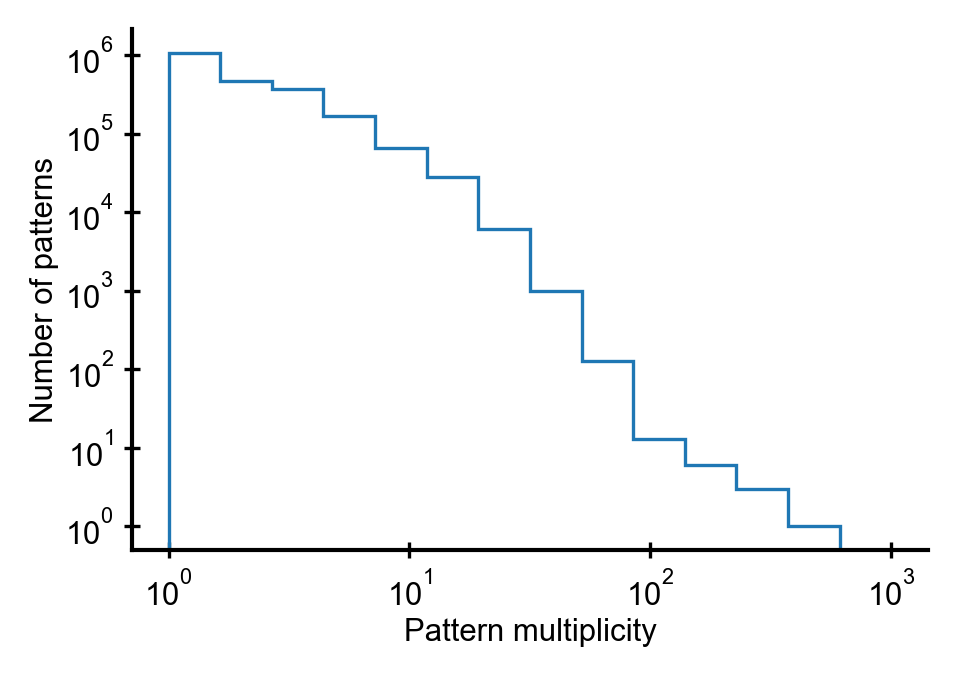

In [11]:
bins = np.logspace(0, 3, 15)
plt.hist(counts_dict['test'], bins, histtype='step', label='test')
#plt.hist(counts_dict['model_ncov'], bins, histtype='step', label=labels['model_ncov'])
#plt.hist(counts_dict['model_nskew'], bins, histtype='step', label=labels['model_nskew'])
#plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Number of patterns')
plt.xlabel('Pattern multiplicity')
plt.savefig('compositional_pattern_multiplicity.png')

In [8]:
'%e'%patterns_dict['train'].shape[0]

'2.182981e+06'

In [13]:
counts_test = []
counts_train = []
for index in np.random.randint(0, patterns_dict['train'].shape[0], 500):
    pattern = patterns_dict['train'][index]
    counts_train.append(counts_dict['train'][index])
    match = np.all(patterns_dict['test'] == pattern, axis=1)
    if np.sum(match) == 1:
        counts_test.append(int(counts_dict['test'][match]))
    else:
        counts_test.append(0)

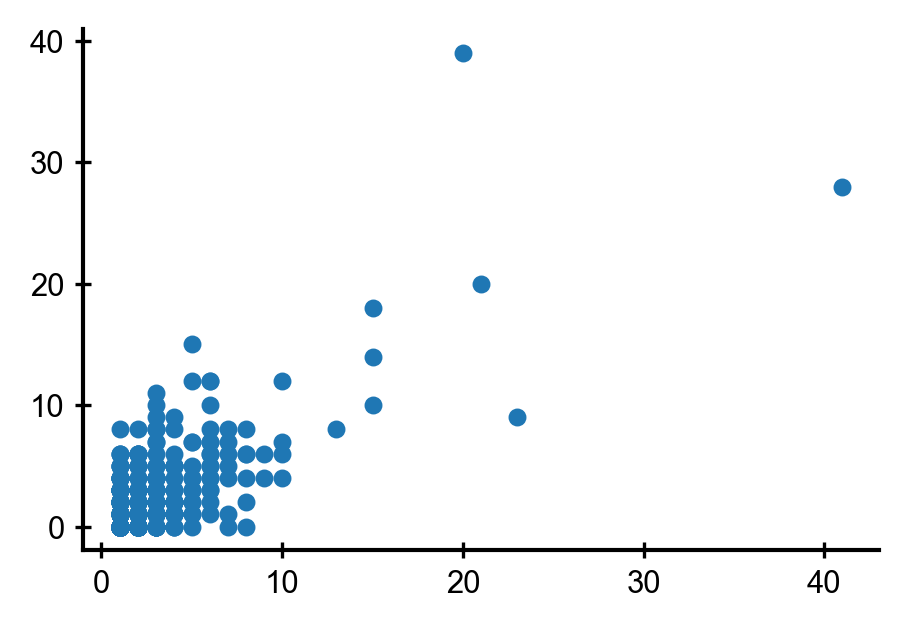

In [14]:
plt.plot(counts_train, counts_test, 'o');